In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Automobile_Insurance_Fraud.csv",na_values="?")
pd.set_option("display.max_columns",None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print("")


194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

28-04-1992    3
05-08-1992    3
01-01-2006    3
07-11-1997    2
09-08-2004    2
             ..
05-10-1991    1
20-11-2008    1
24-05-2001    1
08-08-2010    1
05-05-1993    1
Name: policy_bind_date, Length: 951, dtype: int64

O

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
# change dtypes of given dates as they are in "object" form.. to convert into datetime format
df['policy_bind_day']=pd.to_datetime(df['policy_bind_date']).dt.day
df['policy_bind_month']=pd.to_datetime(df['policy_bind_date']).dt.month
df['policy_bind_year']=pd.to_datetime(df['policy_bind_date']).dt.year

In [9]:
df.drop("policy_bind_date",axis=1,inplace=True)

In [10]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,9,6,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,6,6,2014


In [11]:
df['incident_day']=pd.to_datetime(df['incident_date']).dt.day
df['incident_month']=pd.to_datetime(df['incident_date']).dt.month
df['incident_year']=pd.to_datetime(df['incident_date']).dt.year

In [12]:
df.drop(['incident_date','incident_year'],axis=1,inplace=True)
df.head(2)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014,25,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006,21,1


In [13]:
# Drop some less importent columns
df.drop(['_c39','insured_hobbies',"policy_number"],axis=1,inplace=True)

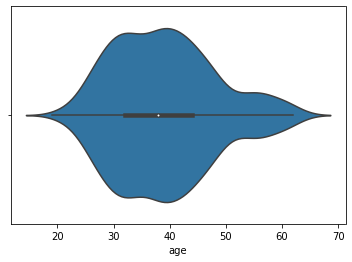

In [14]:
sns.violinplot(x="age",data=df)

In [15]:
print(df['collision_type'].mode())
print(df['property_damage'].mode())
print(df['police_report_available'].mode())

0    Rear Collision
dtype: object
0    NO
dtype: object
0    NO
dtype: object


In [16]:
# imput missing values
df['collision_type'].fillna(str(df['collision_type'].mode().values[0]),inplace=True)
df['property_damage'].fillna(str(df['property_damage'].mode().values[0]),inplace=True)
df['police_report_available'].fillna(str(df['police_report_available'].mode().values[0]),inplace=True)

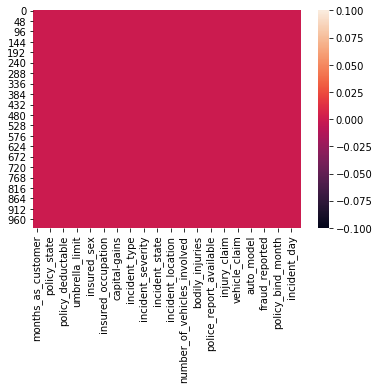

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.051728,0.005750,-0.048276,-0.011092,0.024659
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.053869,0.015501,-0.037444,-0.006131,0.023404
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.009164,-0.050416,-0.049598,-0.018160,-0.006418
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.025183,-0.035355,0.001249,0.014835,0.021559
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,-0.045207,0.009961,0.048008,-0.021716,0.042409
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,-0.039867,0.015864,-0.001100,0.019095,0.005461
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,0.007994,-0.011102,0.041249,0.015418,0.029409
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.038297,0.003436,-0.026420,-0.015035,0.023216
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,-0.009511,-0.000934,0.035412,-0.027965,0.044827
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.005787,-0.044608,0.026595,-0.018672,0.032544


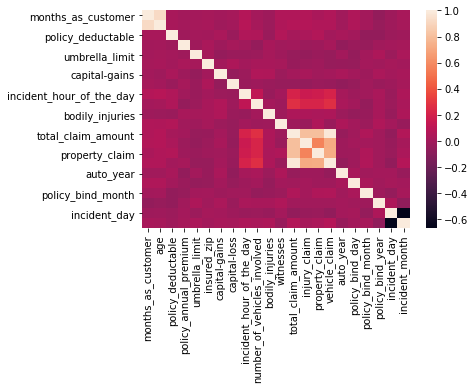

In [19]:
sns.heatmap(df.corr())

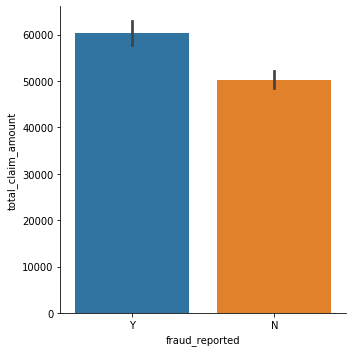

In [20]:
sns.catplot(x="fraud_reported",y="total_claim_amount",data=df,kind="bar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

<Figure size 576x576 with 0 Axes>

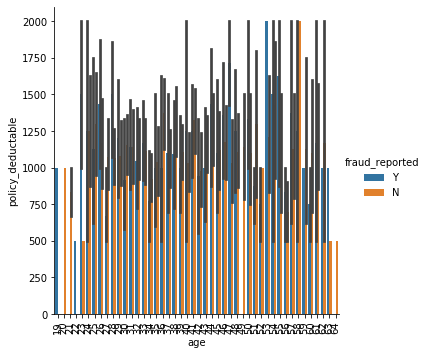

In [21]:
plt.figure(figsize=(8,8))
sns.catplot(x="age",y="policy_deductable",hue="fraud_reported",data=df,kind="bar")
plt.xticks(rotation=90)

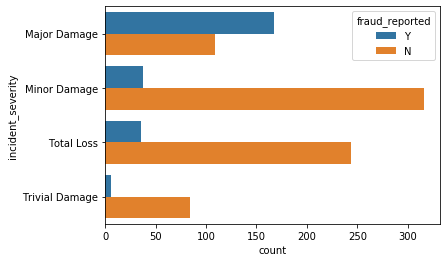

In [22]:
sns.countplot(hue="fraud_reported",y="incident_severity",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

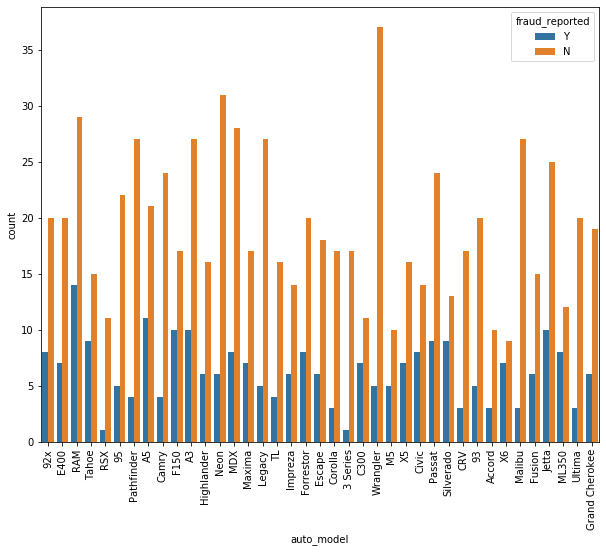

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(hue="fraud_reported",x="auto_model",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

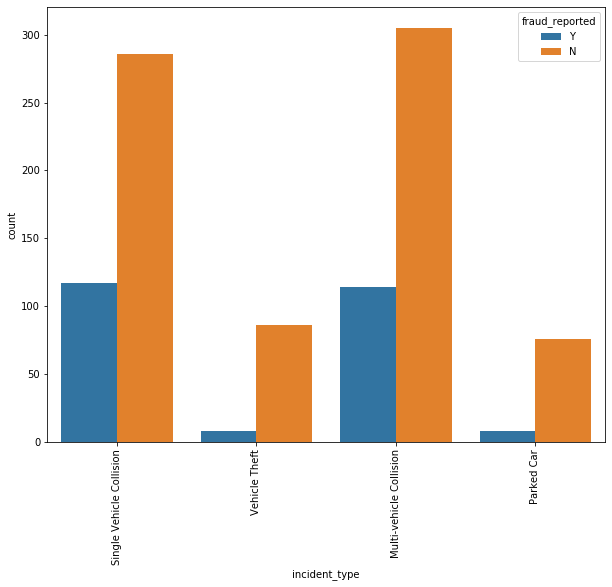

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(hue="fraud_reported",x="incident_type",data=df)
plt.xticks(rotation=90)

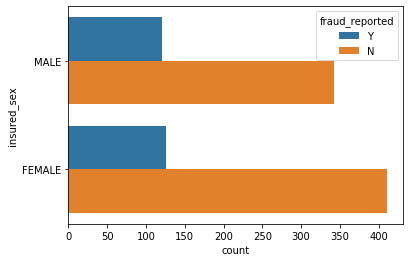

In [25]:
sns.countplot(hue="fraud_reported",y="insured_sex",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

<Figure size 720x576 with 0 Axes>

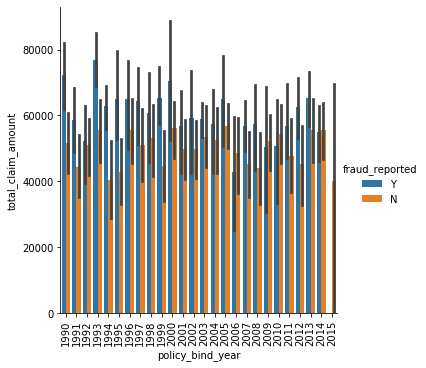

In [26]:
plt.figure(figsize=(10,8))
sns.catplot(x="policy_bind_year",y="total_claim_amount",hue="fraud_reported",data=df,kind="bar")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

<Figure size 720x576 with 0 Axes>

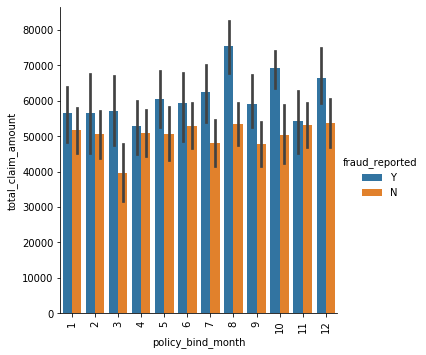

In [27]:
plt.figure(figsize=(10,8))
sns.catplot(x="policy_bind_month",y="total_claim_amount",hue="fraud_reported",data=df,kind="bar")
plt.xticks(rotation=90)

In [28]:
df['fraud_cases']=df["fraud_reported"]
df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,fraud_cases
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,Y


In [29]:
df.drop('fraud_reported',axis=1,inplace=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 <a list of 22 Text xticklabel objects>)

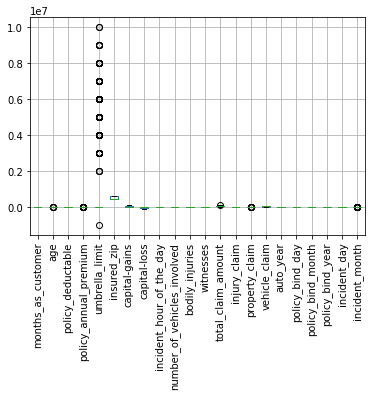

In [30]:
df.boxplot()
plt.xticks(rotation=90)

Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [32]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [33]:
df.drop(['incident_month','incident_day'],axis=1,inplace=True)

In [34]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,fraud_cases
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,17,10,2014,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,2,0,0,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,27,6,2006,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,9,6,2000,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,25,5,1990,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,6,6,2014,0


In [35]:
# removing outliers
from scipy.stats import zscore
print(df.shape)
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(1000, 38)
(980, 38)


In [36]:
# Splitting Data into X and Y
x=df_new.iloc[:,:-1]
print(x.shape)
y=pd.DataFrame(df_new.iloc[:,-1])
print(y.shape)

(980, 37)
(980, 1)


In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
x=pca.fit_transform(x)
x.shape

(980, 20)

In [38]:
type(x)

numpy.ndarray

In [39]:
type(y)

pandas.core.frame.DataFrame

In [40]:
x=pd.DataFrame(x)

In [41]:
type(x)

pandas.core.frame.DataFrame

In [42]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-9.918765e+05,-34201.765338,20604.544603,-1082.946424,39802.755537,1045.912806,-4666.141208,-180.729251,522.105814,122.150376,128.353608,17.524992,1.813112,10.121824,12.206988,0.482081,2.602555,3.208708,1.798455,-3.209063
1,4.008199e+06,-31349.877172,-61116.307094,-30584.939604,1426.262712,-752.633584,254.831010,882.923149,137.607915,-56.884812,26.320641,5.556846,11.637806,4.213513,2.742887,1.229990,-0.475738,0.850117,1.661567,0.278652
2,4.008156e+06,-69523.371640,-24422.852809,-9717.913357,28055.397036,-2646.492067,2674.103260,837.170013,168.702608,172.013913,-78.008063,-12.089465,-5.800440,-2.925172,2.077294,1.472382,-2.225437,-3.020936,-4.998976,-0.909021
3,5.008171e+06,105592.812686,26712.854391,40220.725887,-7913.079406,6320.111495,506.477378,909.057196,150.099606,134.090707,37.454370,-14.290523,10.730246,-13.771497,2.551482,8.940875,5.875389,1.365031,-1.458833,1.573154
4,5.008215e+06,110193.570791,-47010.315674,49455.910650,12308.226170,-349.532802,502.268755,-168.423450,-306.233046,338.941497,24.478733,-11.219493,-8.361826,13.793590,-8.906909,1.566602,0.035754,-8.538385,1.013741,1.758151


In [43]:
x.skew()

0     1.801424
1     0.836955
2    -0.596213
3     0.275963
4     0.108926
5     0.075546
6    -0.045741
7     0.459474
8     0.000300
9     0.033932
10    0.353224
11    0.060125
12    0.039783
13    0.047637
14    0.036728
15   -0.013057
16    0.069707
17    0.005864
18    1.167894
19    0.030058
dtype: float64

In [44]:
#using sqrt function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [45]:
x.skew()

0    -0.777682
1    -0.064618
2    -0.596213
3     0.275963
4     0.108926
5     0.075546
6    -0.045741
7     0.459474
8     0.000300
9     0.033932
10    0.353224
11    0.060125
12    0.039783
13    0.047637
14    0.036728
15   -0.013057
16    0.069707
17    0.005864
18    0.884525
19    0.030058
dtype: float64

In [46]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [47]:
x.skew()

0    -0.777682
1    -0.064618
2    -0.596213
3     0.275963
4     0.108926
5     0.075546
6    -0.045741
7     0.459474
8     0.000300
9     0.033932
10    0.353224
11    0.060125
12    0.039783
13    0.047637
14    0.036728
15   -0.013057
16    0.069707
17    0.005864
18   -0.002914
19    0.030058
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,0.630389,-0.037987,1.463448,0.262642,-1.471169,-0.297813,1.817859,0.507698,1.113999,1.575849,0.206303,1.367755,1.821715,0.080875,0.642704,0.824140,-0.059139,-0.954635
1,-0.101962,NaN,-1.869832,-1.072847,0.052440,-0.188996,0.080345,1.454918,0.479121,-0.236432,0.228441,0.499672,1.324193,0.569369,0.409336,0.206346,-0.117484,0.218348,-0.134240,0.082894
2,-0.101996,NaN,-0.747209,-0.340881,1.031527,-0.664568,0.843107,1.379524,0.587386,0.714948,-0.677043,-1.087086,-0.659996,-0.395277,0.310006,0.247010,-0.549574,-0.775912,NaN,-0.270416
3,0.641596,-0.703932,0.817270,1.410847,-0.290944,1.587061,0.159685,1.497983,0.522614,0.557326,0.325072,-1.285005,1.220928,-1.860933,0.380772,1.499941,1.450935,0.350601,NaN,0.467983
4,0.641627,0.057650,-1.438264,1.734796,0.452543,-0.087772,0.158358,-0.277535,-1.066237,1.408755,0.212454,-1.008858,-0.951440,1.863919,-1.329227,0.262817,0.008830,-2.193041,-0.573692,0.523016


In [49]:
x.isnull().sum()

0     794
1     696
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18    524
19      0
dtype: int64

In [50]:
x.dropna(axis=1,inplace=True)

In [51]:
x.shape

(980, 17)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score,cross_val_predict

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(784, 17) (196, 17)
(784, 1) (196, 1)


In [55]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [56]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))

----------------------- KNeighborsClassifier ----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_Score = 0.6989795918367347


Cross_Val_Score = 0.7418367346938777


roc_auc_score = 0.4787694388100067


classification_report
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       145
           1       0.10      0.02      0.03        51

    accuracy                           0.70       196
   macro avg       0.42      0.48      0.43       196
weighted avg       0.57      0.70      0.62       196



[[136   9]
 [ 50   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



----------------------- SVC ----------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  

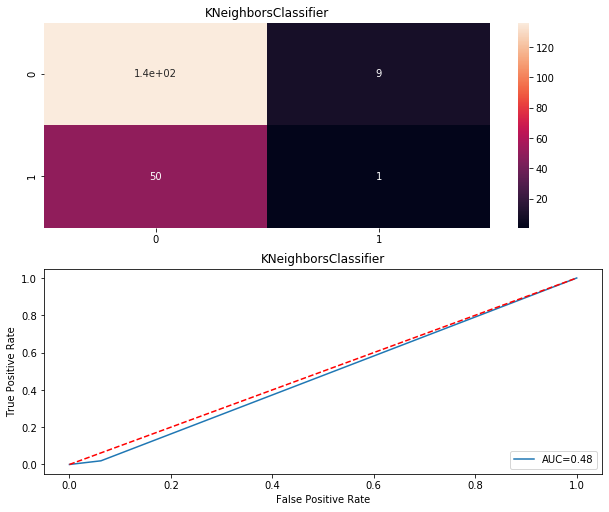

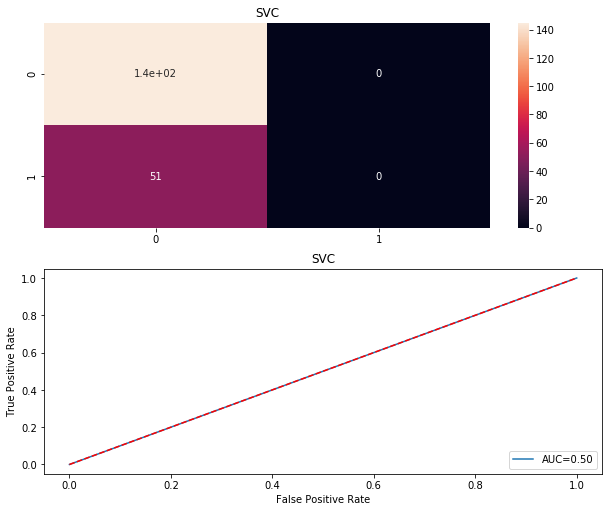

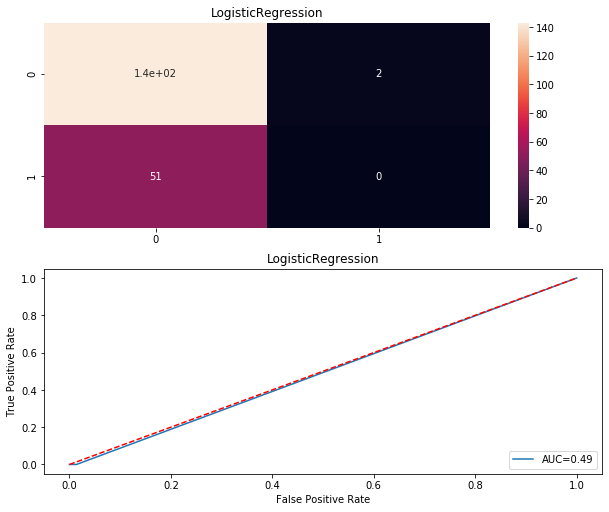

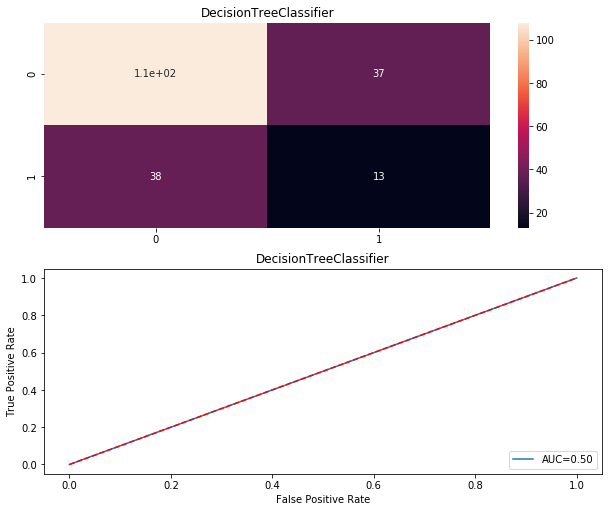

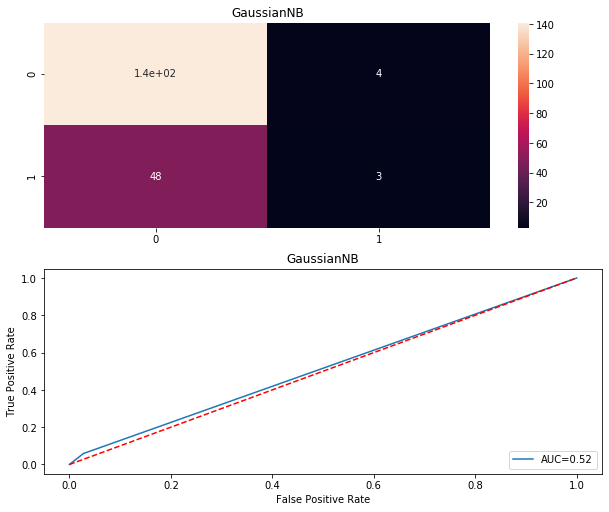

In [57]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("-----------------------",name,"----------------------")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pred)
    print("Accuracy_Score =",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=5,scoring="accuracy").mean()
    print("Cross_Val_Score =",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")

In [58]:
result=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"cross_val_score":cvs,"Roc_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,cross_val_score,Roc_Auc_Curve
0,KNeighborsClassifier,69.897959,74.183673,47.876944
1,SVC,73.979592,75.408163,50.000000
2,LogisticRegression,72.959184,74.795918,49.310345
3,DecisionTreeClassifier,61.734694,63.367347,49.986477
4,GaussianNB,73.469388,73.469388,51.561866


Tunning The Model

In [59]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={"criterion":["gini","entropy"]}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.6346938775510204


In [60]:
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(svc,parameters)
gdsr.fit(x_train,y_train)
gdsr.best_params_

{'C': 1, 'kernel': 'linear'}

In [61]:
svc=SVC(kernel="linear")
score=cross_val_score(svc,x,y,cv=10)
print("Mean_scores",score.mean())
print("Standard_Deviation",score.std())

Mean_scores 0.7551020408163265
Standard_Deviation 0.0


In [62]:
svc=SVC(kernel="linear",C=1)
svc.fit(x,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Using Ensemble Techniques

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7295918367346939
[[143   2]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       145
           1       0.00      0.00      0.00        51

    accuracy                           0.73       196
   macro avg       0.37      0.49      0.42       196
weighted avg       0.55      0.73      0.62       196



In [64]:
scorerf=cross_val_score(rf,x,y,cv=10,scoring="accuracy")
print("Accuracy score :",scorerf)
print("Mean Score :",scorerf.mean())
print("Standard deviation :",scorerf.std())

Accuracy score : [0.74489796 0.75510204 0.74489796 0.70408163 0.7244898  0.75510204
 0.74489796 0.73469388 0.75510204 0.74489796]
Mean Score : 0.7408163265306122
Standard deviation : 0.015272070966424236


In [65]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=61)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7193877551020408
[[134  11]
 [ 44   7]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       145
           1       0.39      0.14      0.20        51

    accuracy                           0.72       196
   macro avg       0.57      0.53      0.52       196
weighted avg       0.66      0.72      0.67       196



In [66]:
scoread=cross_val_score(ad,x,y,cv=10,scoring="accuracy")
print("Accuracy score :",scoread)
print("Mean Score :",scoread.mean())
print("Standard deviation :",scoread.std())

Accuracy score : [0.64285714 0.70408163 0.68367347 0.62244898 0.66326531 0.68367347
 0.68367347 0.70408163 0.70408163 0.73469388]
Mean Score : 0.6826530612244899
Standard deviation : 0.031101531947200348


In [67]:
svc=SVC(kernel="linear")
score=cross_val_score(svc,x,y,cv=10)
svc.fit(x,y)
print("Mean_scores",score.mean())
print("Standard_Deviation",score.std())
y_pred=cross_val_predict(svc,x,y,cv=10)
print("Y Prediction Values")
print(y_pred)
print("Y_PRED.Shape ",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Mean_scores 0.7551020408163265
Standard_Deviation 0.0
Y Prediction Values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0

array([[740,   0],
       [240,   0]], dtype=int64)

In [68]:
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib


In [69]:
joblib.dump(svc,"auto_insurance_fraud.pkl")

['auto_insurance_fraud.pkl']

In [70]:
model=joblib.load("auto_insurance_fraud.pkl")
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])